This data set is taken from the uci repository https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
Features in this data set are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)
3- 32 are divided into three parts first is Mean (3-13), Stranded Error(13-23) and Worst(23-32) and each contain 10 parameter (radius, texture,area, perimeter, smoothness,compactness,concavity,concave points,symmetry and fractal dimension)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.



In [81]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [82]:
#load the data set
missing_values = ["n/a", "na", "--",'?','[]','NaN']
train_data = pd.read_csv("Datasets/BreastCancer/breast-cancer-wisconsin-data.csv")

In [83]:
train_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [84]:
train_data.shape

(569, 33)

In [85]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

the data has 569 instances and 33 attributes.All the independent variables are numeric and the target feature 'diagnosis' is categorical.We can drop the input feature 'id' as it does not impact the target feature.We can also drop the feature'Unnamed:32' as all the values are missing(NaN) and does not affect the target variable.

In [86]:
train_data=train_data.drop(['id','Unnamed: 32'],axis=1)

In [87]:
#check if the data has any missing values
miss_values=train_data.isnull().sum()/len(train_data)
miss_values=miss_values[miss_values>0]
#print only columns having missed values
print("missing values in each column : \n",miss_values)

missing values in each column : 
 Series([], dtype: float64)


There are no missing values in the data.
Let us analyse the distribution of target variable

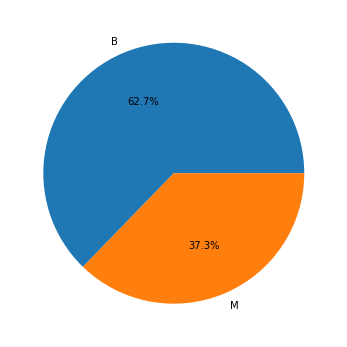

In [88]:
diagnosis_data=train_data.groupby('diagnosis')['diagnosis'].count()/len(train_data)*100
plt.figure(figsize=(16, 6))
plt.pie(diagnosis_data,autopct='%1.1f%%', labels=[diagnosis_data.index[0],diagnosis_data.index[1]])
plt.show()


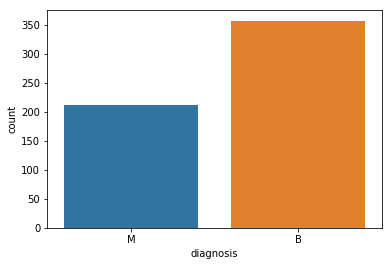

In [89]:
sns.countplot(x="diagnosis", data=train_data)

62.7 % of the total tumors are Benign and 37.25% are malignant
212 are Malignant tumors and 357 are benign tumors

Now let us analyse the independent variables

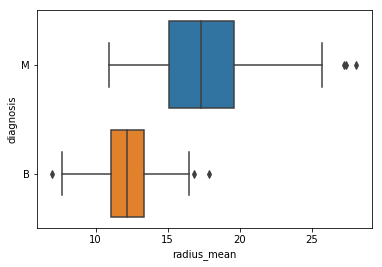

In [90]:
sns.boxplot(x='radius_mean',y='diagnosis',data=train_data)

mean radius of benign tumor is greater than the malignant tumor.So we can say that if the mean radius of the tumor is large say between 15 to 20, there is a chance of tumor being malignant anf if it is greater than 20,it is malignant.

From the box plot of 'radius_mean' we can see that there are 6 outliers ,3 malignant and 3 benign.

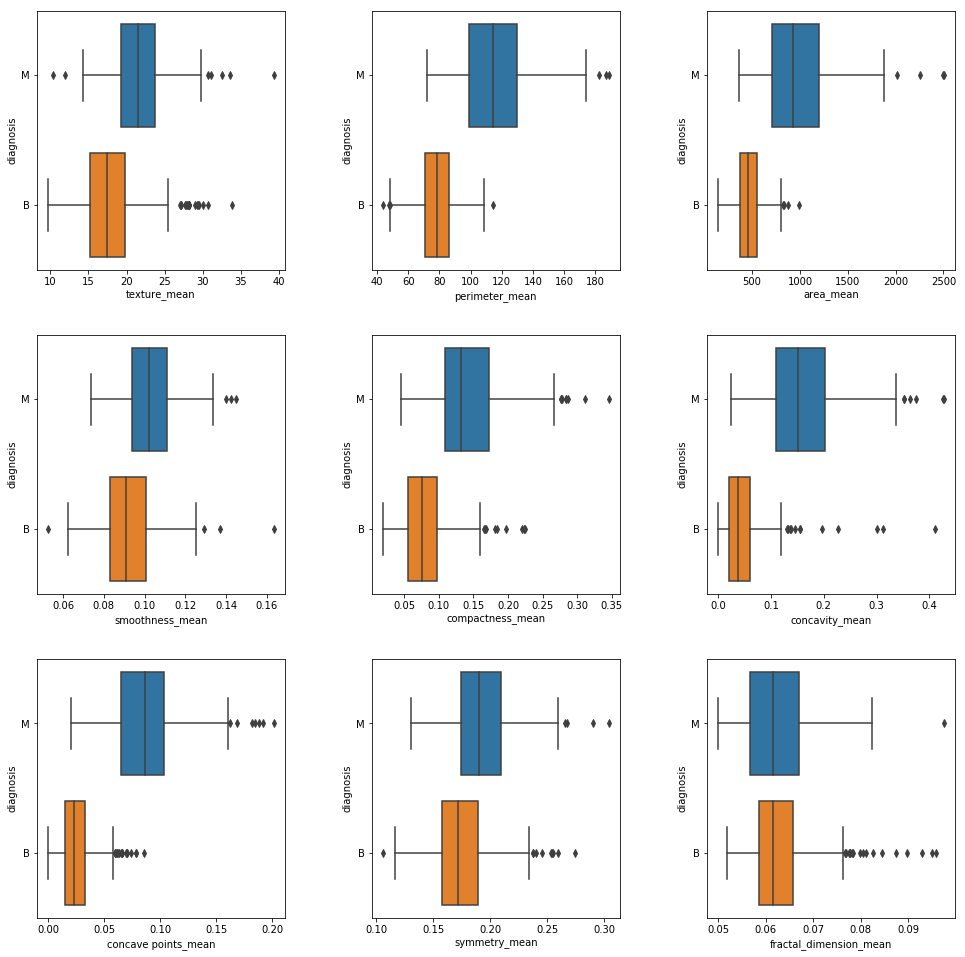

In [91]:
plt.subplots(3,3,figsize=(15,15))
plt.subplot(3,3,1)
plt.xlabel('texture_mean')
plt.ylabel('diagnosis')
sns.boxplot(x='texture_mean',y='diagnosis',data=train_data)


plt.subplot(3,3,2)
plt.xlabel('perimeter_mean')
plt.ylabel('diagnosis')
sns.boxplot(x='perimeter_mean',y='diagnosis',data=train_data)


plt.subplot(3,3,3)
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
sns.boxplot(x='area_mean',y='diagnosis',data=train_data)


plt.subplot(3,3,4)
plt.xlabel('smoothness_mean')
plt.ylabel('diagnosis')
sns.boxplot(x='smoothness_mean',y='diagnosis',data=train_data)



plt.subplot(3,3,5)
plt.xlabel('compactness_mean')
plt.ylabel('diagnosis')
sns.boxplot(x='compactness_mean',y='diagnosis',data=train_data)


plt.subplot(3,3,6)
plt.xlabel('concavity_mean')
plt.ylabel('diagnosis')
sns.boxplot(x='concavity_mean',y='diagnosis',data=train_data)

plt.subplot(3,3,7)
plt.xlabel('concave points_mean')
plt.ylabel('diagnosis')
sns.boxplot(x='concave points_mean',y='diagnosis',data=train_data)

plt.subplot(3,3,8)
plt.xlabel('symmetry_mean')
plt.ylabel('diagnosis')
sns.boxplot(x='symmetry_mean',y='diagnosis',data=train_data)

plt.subplot(3,3,9)
plt.xlabel('fractal_dimension_mean')
plt.ylabel('diagnosis')
sns.boxplot(x='fractal_dimension_mean',y='diagnosis',data=train_data)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

we can analyse the above features similar to 'radius_mean'.In almost all features the maximum value of malignant tumor is greater than that of benign tumor.we can also observe that some of these features has many outliers

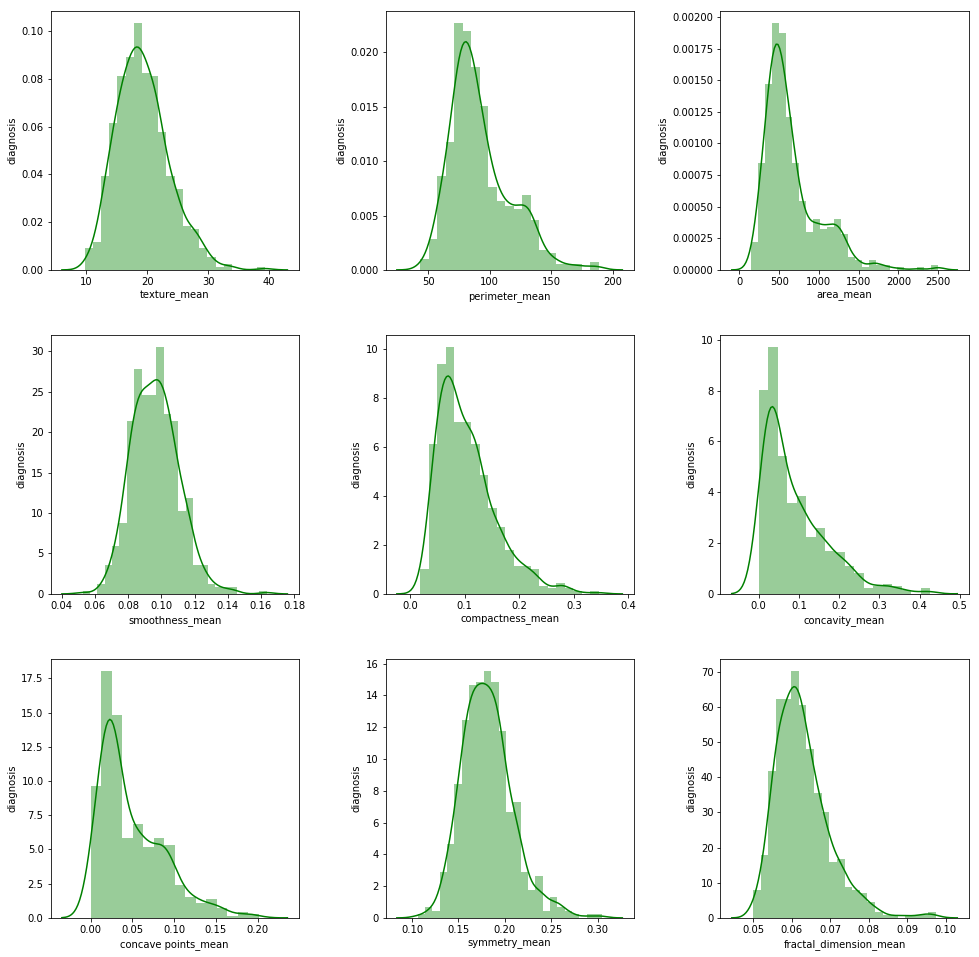

In [92]:
plt.subplots(3,3,figsize=(15,15))
plt.subplot(3,3,1)
plt.xlabel('texture_mean')
plt.ylabel('diagnosis')
sns.distplot(train_data['texture_mean'],kde=True,color='green')

plt.subplot(3,3,2)
plt.xlabel('perimeter_mean')
plt.ylabel('diagnosis')
sns.distplot(train_data['perimeter_mean'],kde=True,color='green')

plt.subplot(3,3,3)
plt.xlabel('area_mean')
plt.ylabel('diagnosis')
sns.distplot(train_data['area_mean'],kde=True,color='green')

plt.subplot(3,3,4)
plt.xlabel('smoothness_mean')
plt.ylabel('diagnosis')
sns.distplot(train_data['smoothness_mean'],kde=True,color='green')


plt.subplot(3,3,5)
plt.xlabel('compactness_mean')
plt.ylabel('diagnosis')
sns.distplot(train_data['compactness_mean'],kde=True,color='green')

plt.subplot(3,3,6)
plt.xlabel('concavity_mean')
plt.ylabel('diagnosis')
sns.distplot(train_data['concavity_mean'],kde=True,color='green')

plt.subplot(3,3,7)
plt.xlabel('concave points_mean')
plt.ylabel('diagnosis')
sns.distplot(train_data['concave points_mean'],kde=True,color='green')

plt.subplot(3,3,8)
plt.xlabel('symmetry_mean')
plt.ylabel('diagnosis')
sns.distplot(train_data['symmetry_mean'],kde=True,color='green')

plt.subplot(3,3,9)
plt.xlabel('fractal_dimension_mean')
plt.ylabel('diagnosis')
sns.distplot(train_data['fractal_dimension_mean'],kde=True,color='green')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

from the distribution plots we can see that the scales of the features are different and there is a need of feature scaling to make the prediction model better and to avoid the feature values with large scale dominating the features with smaller scale.

we can see that features like area_mean,concavity_mean are skewed and we need to convert the features to a normal distribution,so that the model can predict better.

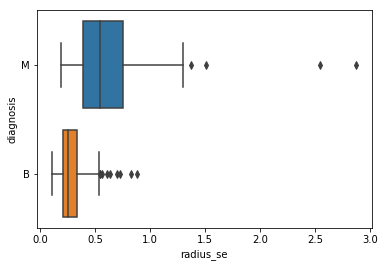

In [93]:
sns.boxplot(x='radius_se',y='diagnosis',data=train_data)

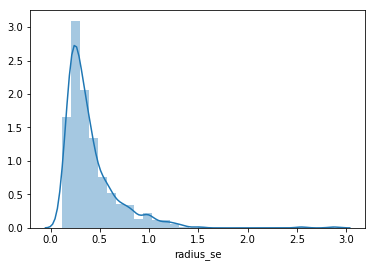

In [94]:
sns.distplot(train_data['radius_se'],kde=True,bins=30)

the feature 'radius_se' has outliers and the distribution is skewed to the right.

In [95]:

radius_se_skew = train_data['radius_se'].skew()
radius_se_kurt = train_data['radius_se'].kurt()

print("Skewness of 'radius_se' is :",radius_se_skew)
print("Kurtisis of 'radius_se' is :",radius_se_kurt)

Skewness of 'radius_se' is : 3.088612166384756
Kurtisis of 'radius_se' is : 17.686725966164637


from the values of skewness and kurtosis we can say this feature is positively skewed and has outliers.we need to remove the outliers to make the model better.

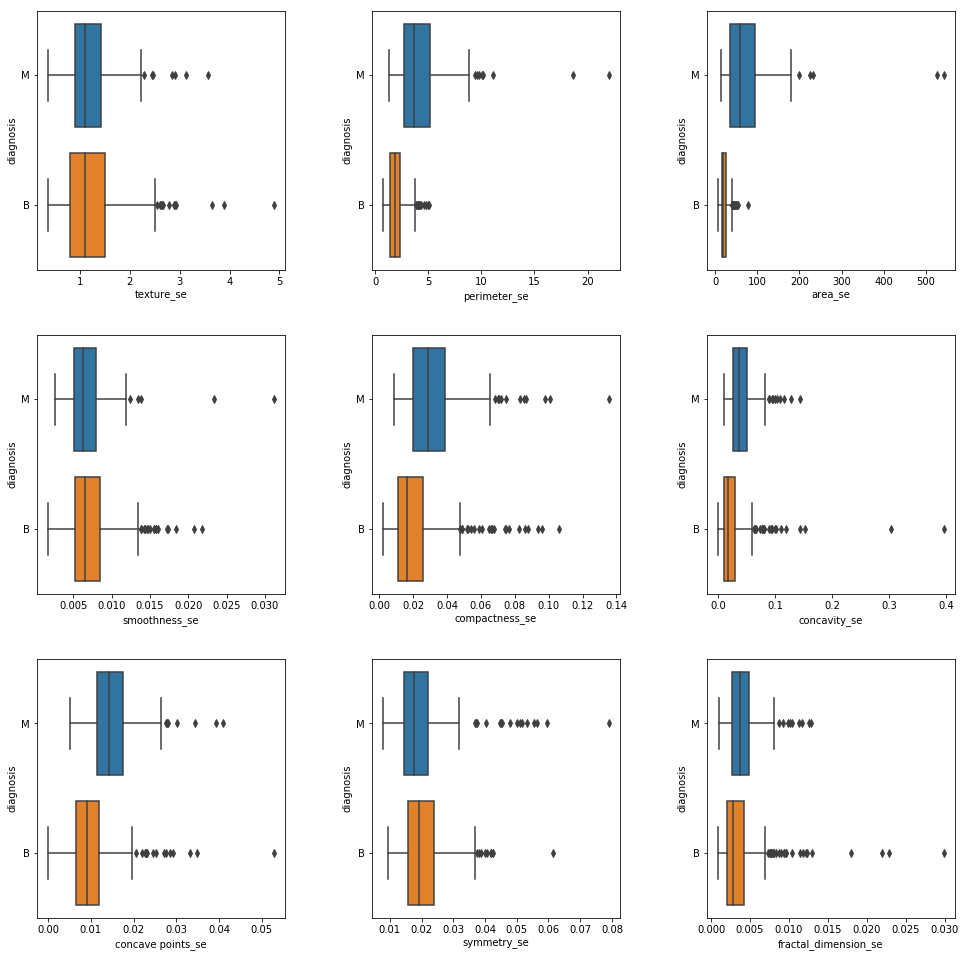

In [96]:
plt.subplots(3,3,figsize=(15,15))
plt.subplot(3,3,1)
plt.xlabel('texture_se')
plt.ylabel('diagnosis')
sns.boxplot(x='texture_se',y='diagnosis',data=train_data)

plt.subplot(3,3,2)
plt.xlabel('perimeter_se')
plt.ylabel('diagnosis')
sns.boxplot(x='perimeter_se',y='diagnosis',data=train_data)


plt.subplot(3,3,3)
plt.xlabel('area_se')
plt.ylabel('diagnosis')
sns.boxplot(x='area_se',y='diagnosis',data=train_data)


plt.subplot(3,3,4)
plt.xlabel('smoothness_se')
plt.ylabel('diagnosis')
sns.boxplot(x='smoothness_se',y='diagnosis',data=train_data)



plt.subplot(3,3,5)
plt.xlabel('compactness_se')
plt.ylabel('diagnosis')
sns.boxplot(x='compactness_se',y='diagnosis',data=train_data)


plt.subplot(3,3,6)
plt.xlabel('concavity_se')
plt.ylabel('diagnosis')
sns.boxplot(x='concavity_se',y='diagnosis',data=train_data)

plt.subplot(3,3,7)
plt.xlabel('concave points_se')
plt.ylabel('diagnosis')
sns.boxplot(x='concave points_se',y='diagnosis',data=train_data)

plt.subplot(3,3,8)
plt.xlabel('symmetry_se')
plt.ylabel('diagnosis')
sns.boxplot(x='symmetry_se',y='diagnosis',data=train_data)

plt.subplot(3,3,9)
plt.xlabel('fractal_dimension_se')
plt.ylabel('diagnosis')
sns.boxplot(x='fractal_dimension_se',y='diagnosis',data=train_data)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

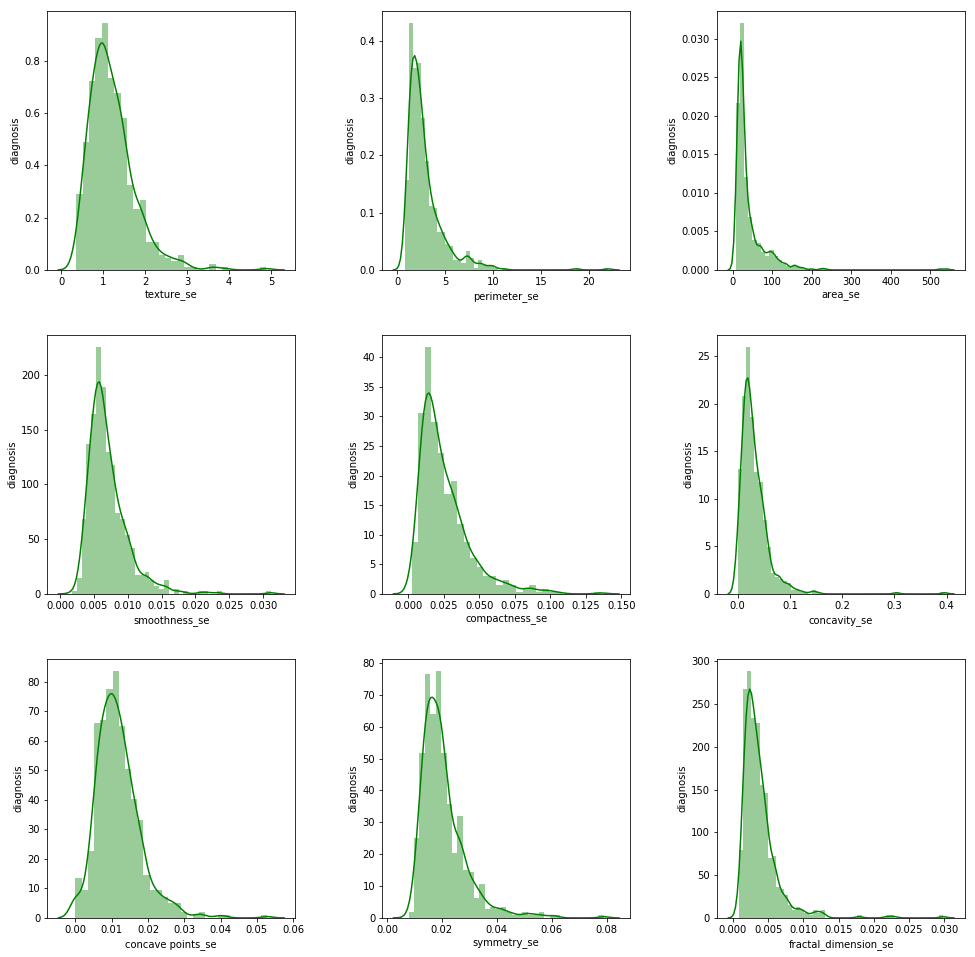

In [97]:
plt.subplots(3,3,figsize=(15,15))
plt.subplot(3,3,1)
plt.xlabel('texture_se')
plt.ylabel('diagnosis')
sns.distplot(train_data['texture_se'],kde=True,color='green')

plt.subplot(3,3,2)
plt.xlabel('perimeter_se')
plt.ylabel('diagnosis')
sns.distplot(train_data['perimeter_se'],kde=True,color='green')

plt.subplot(3,3,3)
plt.xlabel('area_se')
plt.ylabel('diagnosis')
sns.distplot(train_data['area_se'],kde=True,color='green')

plt.subplot(3,3,4)
plt.xlabel('smoothness_se')
plt.ylabel('diagnosis')
sns.distplot(train_data['smoothness_se'],kde=True,color='green')


plt.subplot(3,3,5)
plt.xlabel('compactness_se')
plt.ylabel('diagnosis')
sns.distplot(train_data['compactness_se'],kde=True,color='green')

plt.subplot(3,3,6)
plt.xlabel('concavity_se')
plt.ylabel('diagnosis')
sns.distplot(train_data['concavity_se'],kde=True,color='green')

plt.subplot(3,3,7)
plt.xlabel('concave points_se')
plt.ylabel('diagnosis')
sns.distplot(train_data['concave points_se'],kde=True,color='green')

plt.subplot(3,3,8)
plt.xlabel('symmetry_se')
plt.ylabel('diagnosis')
sns.distplot(train_data['symmetry_se'],kde=True,color='green')

plt.subplot(3,3,9)
plt.xlabel('fractal_dimension_se')
plt.ylabel('diagnosis')
sns.distplot(train_data['fractal_dimension_se'],kde=True,color='green')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

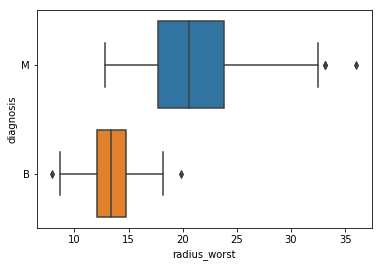

In [98]:
sns.boxplot(x='radius_worst',y='diagnosis',data=train_data)

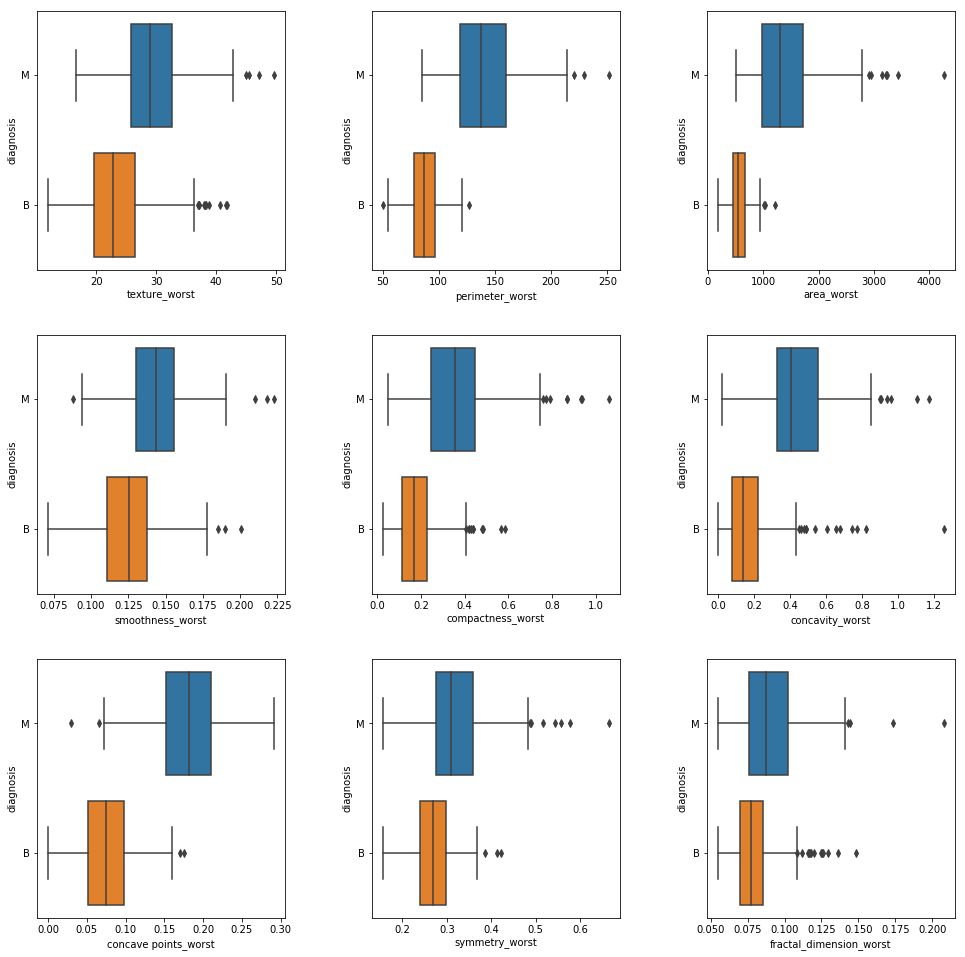

In [99]:
plt.subplots(3,3,figsize=(15,15))
plt.subplot(3,3,1)
plt.xlabel('texture_worst')
plt.ylabel('diagnosis')
sns.boxplot(x='texture_worst',y='diagnosis',data=train_data)

plt.subplot(3,3,2)
plt.xlabel('perimeter_worst')
plt.ylabel('diagnosis')
sns.boxplot(x='perimeter_worst',y='diagnosis',data=train_data)


plt.subplot(3,3,3)
plt.xlabel('area_worst')
plt.ylabel('diagnosis')
sns.boxplot(x='area_worst',y='diagnosis',data=train_data)


plt.subplot(3,3,4)
plt.xlabel('smoothness_worst')
plt.ylabel('diagnosis')
sns.boxplot(x='smoothness_worst',y='diagnosis',data=train_data)



plt.subplot(3,3,5)
plt.xlabel('compactness_worst')
plt.ylabel('diagnosis')
sns.boxplot(x='compactness_worst',y='diagnosis',data=train_data)


plt.subplot(3,3,6)
plt.xlabel('concavity_worst')
plt.ylabel('diagnosis')
sns.boxplot(x='concavity_worst',y='diagnosis',data=train_data)

plt.subplot(3,3,7)
plt.xlabel('concave points_worst')
plt.ylabel('diagnosis')
sns.boxplot(x='concave points_worst',y='diagnosis',data=train_data)

plt.subplot(3,3,8)
plt.xlabel('symmetry_worst')
plt.ylabel('diagnosis')
sns.boxplot(x='symmetry_worst',y='diagnosis',data=train_data)

plt.subplot(3,3,9)
plt.xlabel('fractal_dimension_worst')
plt.ylabel('diagnosis')
sns.boxplot(x='fractal_dimension_worst',y='diagnosis',data=train_data)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

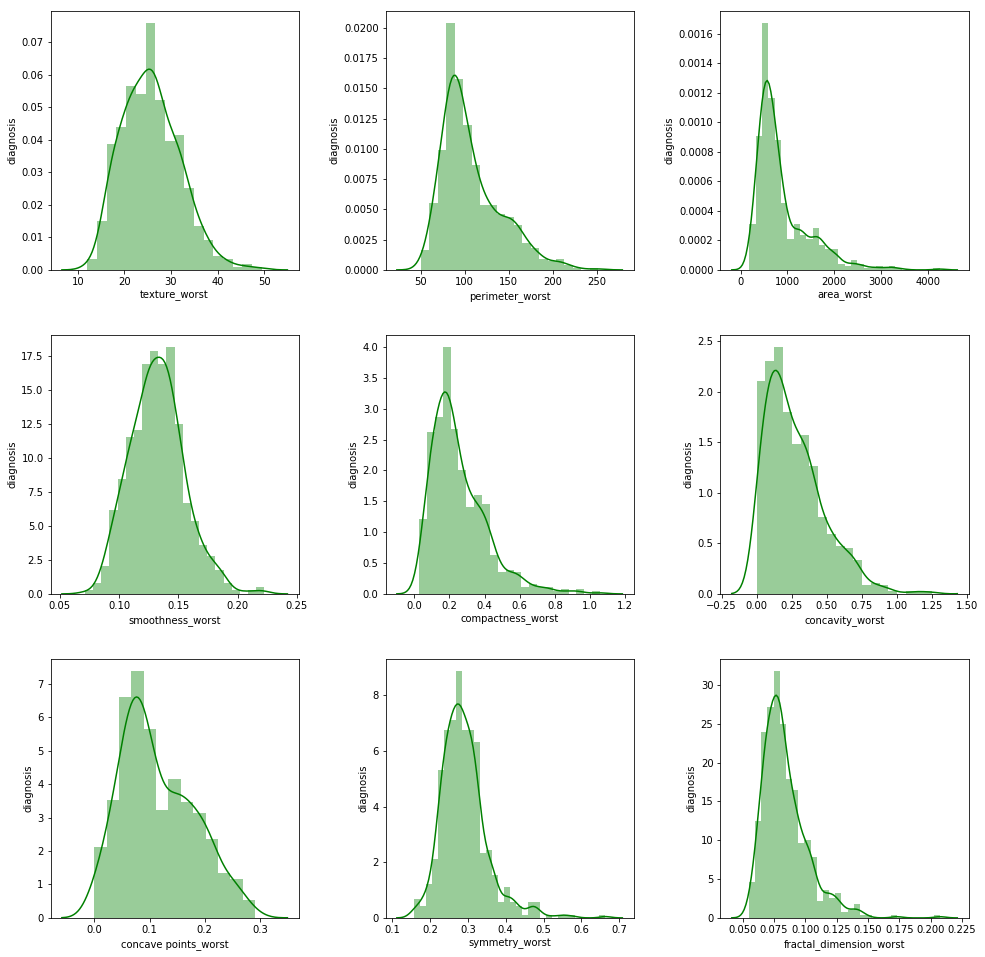

In [100]:
plt.subplots(3,3,figsize=(15,15))
plt.subplot(3,3,1)
plt.xlabel('texture_worst')
plt.ylabel('diagnosis')
sns.distplot(train_data['texture_worst'],kde=True,color='green')

plt.subplot(3,3,2)
plt.xlabel('perimeter_worst')
plt.ylabel('diagnosis')
sns.distplot(train_data['perimeter_worst'],kde=True,color='green')

plt.subplot(3,3,3)
plt.xlabel('area_worst')
plt.ylabel('diagnosis')
sns.distplot(train_data['area_worst'],kde=True,color='green')

plt.subplot(3,3,4)
plt.xlabel('smoothness_worst')
plt.ylabel('diagnosis')
sns.distplot(train_data['smoothness_worst'],kde=True,color='green')


plt.subplot(3,3,5)
plt.xlabel('compactness_worst')
plt.ylabel('diagnosis')
sns.distplot(train_data['compactness_worst'],kde=True,color='green')

plt.subplot(3,3,6)
plt.xlabel('concavity_worst')
plt.ylabel('diagnosis')
sns.distplot(train_data['concavity_worst'],kde=True,color='green')

plt.subplot(3,3,7)
plt.xlabel('concave points_worst')
plt.ylabel('diagnosis')
sns.distplot(train_data['concave points_worst'],kde=True,color='green')

plt.subplot(3,3,8)
plt.xlabel('symmetry_worst')
plt.ylabel('diagnosis')
sns.distplot(train_data['symmetry_worst'],kde=True,color='green')

plt.subplot(3,3,9)
plt.xlabel('fractal_dimension_worst')
plt.ylabel('diagnosis')
sns.distplot(train_data['fractal_dimension_worst'],kde=True,color='green')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

In [101]:
train_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


from the above table,it can be observed that max value of area_mean is 2500 and the max value of fractional_dimension_mean is 0.097440.So we need to apply standardization or normalization for the data.

In [102]:
from sklearn.preprocessing import MinMaxScaler
features=train_data.iloc[:,1:].columns
# Create the Scaler object
scaler =MinMaxScaler()
# Fit your data on the scaler object for standardization
train_data.iloc[:,1:] = scaler.fit_transform(train_data.iloc[:,1:])
train_data.iloc[:,1:] = pd.DataFrame(train_data.iloc[:,1:], columns=features)

In [103]:
train_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature Selection and Predictive Models

#### Correlation of the features

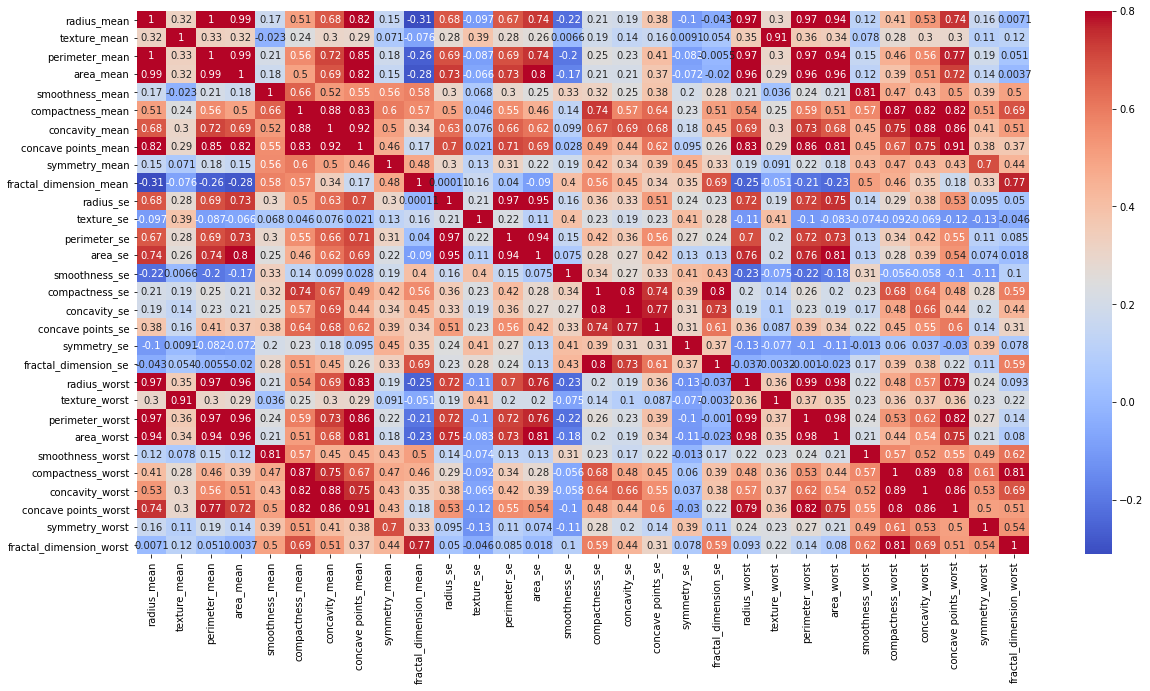

In [104]:
#correlation of the variables
corr_data=train_data.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr_data,cmap='coolwarm',linecolor='white', vmax=.8,annot_kws={'size': 10}, annot=True);

from the correlation map,we can infer the following.

radius_mean,area_mean,perimeter_mean,radius_worst,perimeter_worst,area_worst are highly correlated to each other. so we will keep area_mean and remove all the others

texture_mean,texture_worst are highly correlated to each other. so we will keep texture_mean and remove the other one

concave_points_mean,concavity_mean,concave_points_worst are highly correlated to each other. so we will keep concavity_mean and remove all the others

perimeter_se,area_se,radius_se are highly correlated to each other. so we will keep area_se and remove all the others

In [105]:
#selected features from correlation matrix
selected_features_corr=train_data[['texture_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean',
                                 'fractal_dimension_mean','texture_se','perimeter_se','smoothness_se','compactness_se','concavity_se',
                                 'concave points_se','symmetry_se','fractal_dimension_se','smoothness_worst','compactness_worst','concavity_worst',
                                 'symmetry_worst','fractal_dimension_worst','diagnosis']]

In [106]:
selected_features_corr.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.022658,0.363733,0.593753,0.792037,0.703140,0.686364,0.605518,0.120469,0.369034,0.159296,...,0.135682,0.300625,0.311645,0.183042,0.601136,0.619292,0.568610,0.598462,0.418864,M
1,0.272574,0.501591,0.289880,0.181768,0.203608,0.379798,0.141323,0.082589,0.124440,0.119387,...,0.046970,0.253836,0.084539,0.091110,0.347553,0.154563,0.192971,0.233590,0.222878,M
2,0.390260,0.449417,0.514309,0.431017,0.462512,0.509596,0.211247,0.094303,0.180370,0.150831,...,0.096768,0.389847,0.205690,0.127006,0.483590,0.385375,0.359744,0.403706,0.213433,M
3,0.360839,0.102906,0.811321,0.811361,0.565604,0.776263,1.000000,0.175875,0.126655,0.251453,...,0.142955,0.353665,0.728148,0.287205,0.915472,0.814012,0.548642,1.000000,0.773711,M
4,0.156578,0.489290,0.430351,0.347893,0.463918,0.378283,0.186816,0.093065,0.220563,0.332359,...,0.143636,0.357075,0.136179,0.145800,0.437364,0.172415,0.319489,0.157500,0.142595,M


#### RandomForestClassifier

In [138]:
#To store the accuracies and CV scores for the RandomForest and SVM models with and with out parameter tuning
Accuracy_list_final=[]
CV_scores_final=[]

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [108]:
#label encoding the target variable
from sklearn.preprocessing import LabelEncoder
labelencoder_y=LabelEncoder()
selected_features_corr.iloc[:,-1]=labelencoder_y.fit_transform(selected_features_corr.iloc[:,-1])

In [109]:
selected_features_corr.head()

,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,0.022658,0.363733,0.593753,0.792037,0.703140,0.686364,0.605518,0.120469,0.369034,0.159296,...,0.135682,0.300625,0.311645,0.183042,0.601136,0.619292,0.568610,0.598462,0.418864,1
1,0.272574,0.501591,0.289880,0.181768,0.203608,0.379798,0.141323,0.082589,0.124440,0.119387,...,0.046970,0.253836,0.084539,0.091110,0.347553,0.154563,0.192971,0.233590,0.222878,1
2,0.390260,0.449417,0.514309,0.431017,0.462512,0.509596,0.211247,0.094303,0.180370,0.150831,...,0.096768,0.389847,0.205690,0.127006,0.483590,0.385375,0.359744,0.403706,0.213433,1
3,0.360839,0.102906,0.811321,0.811361,0.565604,0.776263,1.000000,0.175875,0.126655,0.251453,...,0.142955,0.353665,0.728148,0.287205,0.915472,0.814012,0.548642,1.000000,0.773711,1
4,0.156578,0.489290,0.430351,0.347893,0.463918,0.378283,0.186816,0.093065,0.220563,0.332359,...,0.143636,0.357075,0.136179,0.145800,0.437364,0.172415,0.319489,0.157500,0.142595,1


Malignant is encoded as 1 and Benign is encoded as 0

In [110]:
X=selected_features_corr.iloc[:,:-1].to_numpy()
y=selected_features_corr.iloc[:,-1].to_numpy()

In [111]:
# split data train 80 % and test 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
#Fitting RandomForest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
RFclassifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
RFclassifier.fit(X_train,y_train)

#predicting test results

y_pred=RFclassifier.predict(X_test)

In [139]:
#evaluating the performance of RandomForest Classification
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[62  5]
 [ 3 44]]


In [140]:
from sklearn import metrics
accuracy_rf = metrics.accuracy_score(y_pred,y_test)
print("Random Forest Accuracy without parameter tuning: %s" % "{0:.3%}".format(accuracy_rf))
Accuracy_list_final.append(accuracy_rf)

Random Forest Accuracy without parameter tuning: 92.982%


In [141]:
from sklearn.model_selection import cross_val_score

RF_cvscores = cross_val_score(RFclassifier, X, y, cv=5)
print("CV score of Random Forest with out parameter tuning: %0.2f (+/- %0.2f)" % (RF_cvscores.mean(), RF_cvscores.std() * 2))
CV_scores_final.append(RF_cvscores.mean())

CV score of Random Forest with out parameter tuning: 0.94 (+/- 0.03)


Parameters to be tuned for Random Forest:

n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

In [73]:
#parameter tuning of Random Forest with gridsearchCV
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [74]:
#classifier
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 4320 candidates, totalling 21600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 29.8min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 34.5min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 10360 tasks      |

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [78]:
rf_tune_params=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=20,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,bootstrap=False,random_state=0)
rf_tune_params.fit(X_train,y_train)

#predicting test results

y_pred_best=rf_tune_params.predict(X_test)


In [79]:
#evaluating the performance of RandomForest Classification with best parameters after tuning
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_best)
print(cm)

[[65  2]
 [ 2 45]]


total number of incorrect predictions(False positives and False negatives):
without tuning the parameters:8
with best parameters:4
By comparing the confusion matrices of with and without tuning the parameters of randomforest classifier,it can be observed that the total number of incorrect predictions are less(4) after the model is fit with best parameters.

In [142]:
from sklearn import metrics
accuracy_rf_best = metrics.accuracy_score(y_pred_best,y_test)
print("Random Forest Accuracy with parameter tuning: %s" % "{0:.3%}".format(accuracy_rf_best))
Accuracy_list_final.append(accuracy_rf_best)

Random Forest Accuracy with parameter tuning: 96.491%


Accuracy has been increased from 92.982% to 96.491%

In [143]:
from sklearn.model_selection import cross_val_score

RF_cvscores_best = cross_val_score(rf_tune_params, X, y, cv=5)
print("CV score of Random Forest with parameter tuning: %0.2f (+/- %0.2f)" % (RF_cvscores_best.mean(), RF_cvscores_best.std() * 2))
CV_scores_final.append(RF_cvscores_best.mean())

CV score of Random Forest with parameter tuning: 0.97 (+/- 0.05)


Cross Validation score has also increased by 3%

The drawback observed here is it took more than an hour to find the best parameters

#### SupportVectorMachine

In [119]:
#Fitting linear SVM classifier to the Training set
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear',random_state=0)
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [122]:
#predicting test results

y_pred_svm=svm_clf.predict(X_test)

In [123]:
#evaluating the linear SVM classifier
#making the confusion matrix
cm_svc=confusion_matrix(y_test,y_pred_svm)
print(cm_svc)

[[67  0]
 [ 5 42]]


In [144]:
accuracy_svm = metrics.accuracy_score(y_pred_svm,y_test)
print("Linear SVM Accuracy without parameter tuning: %s" % "{0:.3%}".format(accuracy_svm))
Accuracy_list_final.append(accuracy_svm)

Linear SVM Accuracy without parameter tuning: 95.614%


In [145]:
SVM_cvscores = cross_val_score(svm_clf, X, y, cv=5)
print("CV score of linear SVM without parameter tuning: %0.2f (+/- %0.2f)" % (SVM_cvscores.mean(), SVM_cvscores.std() * 2))
CV_scores_final.append(SVM_cvscores.mean())

CV score of linear SVM without parameter tuning: 0.96 (+/- 0.03)


In [128]:
#tuning the parameters for linear SVM 
C_range=[0.1,1,10,100]
# gamma=[0.1,1,10,100]
# kernel=['rbf','sigmoid','poly']
param_grid_svmlin ={'C':C_range}
print(param_grid_svmlin)

{'C': [0.1, 1, 10, 100]}


In [129]:
#classifier
svm_linear = SVC(kernel='linear',random_state=0)
grid_search_svm_lin = GridSearchCV(estimator = svm_linear, param_grid = param_grid_svmlin, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search_svm_lin.fit(X_train,y_train)
grid_search_svm_lin.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    3.2s finished


{'C': 10}

In [130]:
svm_linear_best=SVC(kernel='linear',C=10,random_state=0)
svm_linear_best.fit(X_train,y_train)

#predicting test results

y_pred_best_svlin=svm_linear_best.predict(X_test)

In [146]:
#evaluating the performance of SVC linear Classification with best parameters after tuning
#making the confusion matrix

cm_svc_lin=confusion_matrix(y_test,y_pred_best_svlin)
print(cm_svc_lin)

accuracy_svlin_best = metrics.accuracy_score(y_pred_best_svlin,y_test)
print("Linear SVC Accuracy with parameter tuning: %s" % "{0:.3%}".format(accuracy_svlin_best))
Accuracy_list_final.append(accuracy_svlin_best)


LinSVC_cvscores_best = cross_val_score(svm_linear_best, X, y, cv=5)
print("CV score of Linear SVC with parameter tuning: %0.2f (+/- %0.2f)" % (LinSVC_cvscores_best.mean(), LinSVC_cvscores_best.std() * 2))
CV_scores_final.append(LinSVC_cvscores_best.mean())

[[66  1]
 [ 2 45]]
Linear SVC Accuracy with parameter tuning: 97.368%
CV score of Linear SVC with parameter tuning: 0.96 (+/- 0.02)


In [132]:
#tuning the parameters for non-linear SVM 
C_range=[0.1,1,10,100]
gamma_range=[0.1,1,10,100]
kernelType=['rbf','sigmoid','poly']
param_grid_svm_nonl ={'C':C_range,'gamma':gamma_range,'kernel':kernelType}
print(param_grid_svm_nonl)

{'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['rbf', 'sigmoid', 'poly']}


In [135]:
#classifier
svm_nonlinear = SVC(kernel='sigmoid',random_state=0)
grid_search_svm_nlin = GridSearchCV(estimator = svm_nonlinear, param_grid = param_grid_svm_nonl, 
                          cv = 5, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search_svm_nlin.fit(X_train,y_train)
grid_search_svm_nlin.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.1s finished


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [136]:
svm_nonlinear_best=SVC(kernel='rbf',C=10,gamma=1,random_state=0)
svm_nonlinear_best.fit(X_train,y_train)

#predicting test results

y_pred_best_svnlin=svm_nonlinear_best.predict(X_test)

In [152]:
#evaluating the performance of SVC non linear Classification with best parameters after tuning
#making the confusion matrix

cm_svc_nlin=confusion_matrix(y_test,y_pred_best_svnlin)
print(cm_svc_nlin)

accuracy_svnlin_best = metrics.accuracy_score(y_pred_best_svnlin,y_test)
print("Non Linear SVC Accuracy with parameter tuning: %s" % "{0:.3%}".format(accuracy_svnlin_best))
Accuracy_list_final.append(accuracy_svnlin_best)


NonLinSVC_cvscores_best = cross_val_score(svm_nonlinear_best, X, y, cv=5)
print("CV score of NonLinear SVC with parameter tuning: %0.2f (+/- %0.2f)" % (NonLinSVC_cvscores_best.mean(), NonLinSVC_cvscores_best.std() * 2))
CV_scores_final.append(NonLinSVC_cvscores_best.mean())

[[67  0]
 [ 1 46]]
Non Linear SVC Accuracy with parameter tuning: 99.123%
CV score of NonLinear SVC with parameter tuning: 0.98 (+/- 0.01)


In [153]:
print(Accuracy_list_final)
print(CV_scores_final)

[0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.9736842105263158, 0.9912280701754386]
[0.9420854174682569, 0.9650019238168527, 0.9579222777991536, 0.9614005386687188, 0.975375144286264]


In [154]:
Predicted_models=['RF','RF_tuning','LinearSVC','LinearSVC_tuning','NonLinearSVC_tuning']

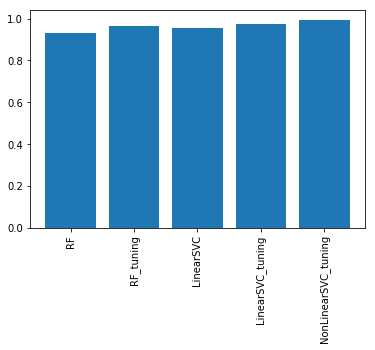

In [157]:
#plot the accuracies
y_pos = np.arange(len(Predicted_models))
plt.bar(y_pos, Accuracy_list_final)
plt.xticks(y_pos, Predicted_models,rotation=90)
plt.show()



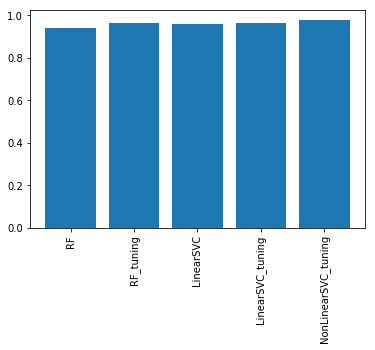

In [158]:
#plot the  CV scores
y_pos = np.arange(len(Predicted_models))
plt.bar(y_pos, CV_scores_final)
plt.xticks(y_pos, Predicted_models,rotation=90)
plt.show()

Both Random Forest and Support Vector Machine Models perform with very high accuracy on this dataset.RandomForest model is even more accurate than Random Forest model without parameter tuning. Non Linear SVM Model with parameter tuning is more accurate than Linear SVM with and without parameter Tuning